---
title: pyCATHY a python wrapper for Data Assimilation in CATHY
subtitle: Notebook for the CATHY days 2023
doi: doi here
license: CC-BY-4.0
github: https://github.com/BenjMy/pycathy_wrapper/tree/main/doc/content/FromLiterature
subject: Tutorial
venue: CATHY days 2023
authors:
  - name: B. Mary
    orcid: 0000-0001-7199-2885
    affiliations:
      - Department of Geosciences, University of Padova, Padova, Italy
    roles:
      - Notebook preparation
---

```{image} ./img/CATHYdays2023.png
:alt: ERT Inv Noble
:width: 700px
:align: right
```

In [ ]:
:::{important} Versions
- CATHY [1.0](https://bitbucket.org/cathy1_0/cathy/src/master/runs/weilletal/input/dem_parameters)
- pyCATHY [0.1.1](https://pypi.org/project/pycathy/)
:::

::: {note} Table of content

1. [Introduction](intro-target)

2. [Quick start](start-target)

 - 2.1 Installation
 - 2.2 Create a project
 - 2.3 Basics functions

3. [Examples](examples-target)
 - 3.1 Catchment hydrology 
    - **La Cecilia and Camporese (2022)**: Resolving streamflow diel fluctuations in a small agricultural catchment with an integrated surface-subsurface hydrological model
    - **Proof of concept**: On the use of Sentinel data to prepare CATHY preprocessing inputs

 - 3.2 Data Assimilation 🚧
   - **Mary et al. In prep**: Untangling Feddes parameters via EnKF Assimilation of Electrical Resistivity Tomography into a macroscopic RWU model

4. [Challenges and perspectives](challenges-target)
    - How to share codes and data?
    - How to ensure reproducibility?
:::

(intro-target)=
## 1. Introduction

pyCATHY holds for **python** CATHY. 

Essentially it wraps the CATHY core to update/modify on the input files and has some **potential applications to ease preprocessing step**.

![CATHY_Core.png](attachment:722d5bba-212b-4de2-863d-fc2213496d1a.png)

### Motivations


::::{grid} 1 2 2 2

:::{grid-item-card}
**1. Connect with other libraries**
^^^
- Uncertainties, sensibility analysis: PEST, Sobol, 
- Energy Balance model: [pyTSEB](https://github.com/hectornieto/pyTSEB)
- Land Surface Model: [Noah-MP](https://egusphere.copernicus.org/preprints/2023/egusphere-2023-675/egusphere-2023-675.pdf) ([Niu et al. 2014]( https://doi.org/10.1002/eco.1362))
:::

:::{grid-item-card}
**2. Sequential Data Assimilation**
^^^
- Python geophysical libraries: [Resipy](https://gitlab.com/hkex/resipy/-/tree/master/src/resipy), [pyGIMLI](https://www.pygimli.org/), [Simpeg](https://simpeg.xyz/)
- Geospatial analysis [Geemap](https://geemap.org/), Remote sensing, satellite imaging
:::

:::{grid-item-card}
**3. Reproducibility** 🔁
^^^
- Code encapsulation and version control
- Dependency management
- Standardized interfaces
- Documentation and examples
- Community collaboration
:::


:::{grid-item-card}
**4. Teaching**
- [Teaching and Learning with Jupyter](https://jupyter4edu.github.io/jupyter-edu-book/)
  - Execute notebook cells
  - Store results, and insert outputs across pages.
:::

::::


:::{hint} Example of Fotran codes with python wrapper
- [MODFLOW](https://www.usgs.gov/software/flopy-python-package-creating-running-and-post-processing-modflow-based-models) --> [flopy](https://github.com/modflowpy/flopy
): Python Package for Creating, Running, and Post-Processing MODFLOW-Based Models
- [HYDRUS](https://github.com/phydrus/phydrus) --> phydrus
- [pflotran](https://www.pflotran.org/) --> [pyflotran](https://github.com/pinshuai/pyflotran-bitbucket)
:::


(start-target)=
## 2. Quick start

### Installation


The installation steps are describe in the online [pyCATHY documentation](https://benjmy.github.io/pycathy_wrapper/).

After installing **miniconda** (a free minimal installer for conda) or anaconda which provide a python distribution it should be fairly easy as: 
```python
conda create --name pyCATHY python=3.10
conda activate pyCATHY
python setup.py install
```

:::{warning} Working Distributions


```{image} ./img/Windows_mac_linux.png
:alt: Beautiful Sunset
:width: 500px
:align: center
```

Yet the wrapper has been only tested on **Unbuntu**. In the near future we expect to test it for windows. 
:::



:::{warning} Dependencies



```{image} ./img/Conda.png
:alt: Beautiful Sunset
:width: 500px
:align: center
```


All the dependencies are managed using a package manager (conda) except for the gfortran compiler that needs to be installed on the laptop. 
In a future release, we would avoid this by adding gfortran compiler directly from conda. 
:::

:::{warning} Optionnal dependencies
Optionnal dependencies such as **geophysical libraries** need to be installed on top of pyCATHY. We recommand using the conda manager.
:::

### 🏁 Create a project

```python
import pyCATHY # Import pyCATHY
from pyCATHY import CATHY
my_project = CATHY()
```

:::{tip} OOP (Object Oriented Programmation)
The created `my_project` object allows you to call a variety of functions:

```python
 - my_project.run_preprocessor()
 - my_project.run_processor()
 - my_project.update_soil()
 - my_project.show_input('DEM')
 - ...
```
   
:::



In [4]:
import pyCATHY
from pyCATHY import CATHY

my_project = CATHY()

🏁 Initiate CATHY object

![CATHYOOP.png](attachment:49b9f2f7-6398-42fa-b593-3fc10319912c.png)

In [ ]:
# Test here the OOP CATHY


:::{tip}
Give the **directory name** and **project name** to CATHY to create the project files.
:::

In [5]:
my_project = CATHY(dirName='CATHY_days_2023',prj_name='my_intro_prj')

🏁 Initiate CATHY object

In [ ]:
import os
!ls -l

### Update prepro inputs

![CATHY_fct.png](attachment:5e37fdcb-aba5-4150-ab19-143822e6a907.png)

```python
my_project.update_FILENAME()
```



In [6]:
import pyvista as pv
pv.set_jupyter_backend('static')
#pv.global_theme.jupyter_backend = 'pythreejs'


import matplotlib as mpl
import matplotlib.pyplot as plt
# set some default plotting parameters for nicer looking plots
mpl.rcParams.update({"axes.grid":True, "grid.color":"gray", "grid.linestyle":'--','figure.figsize':(10,10)})

🔄 Update hap.in file

🔄 update dem_parameters file 

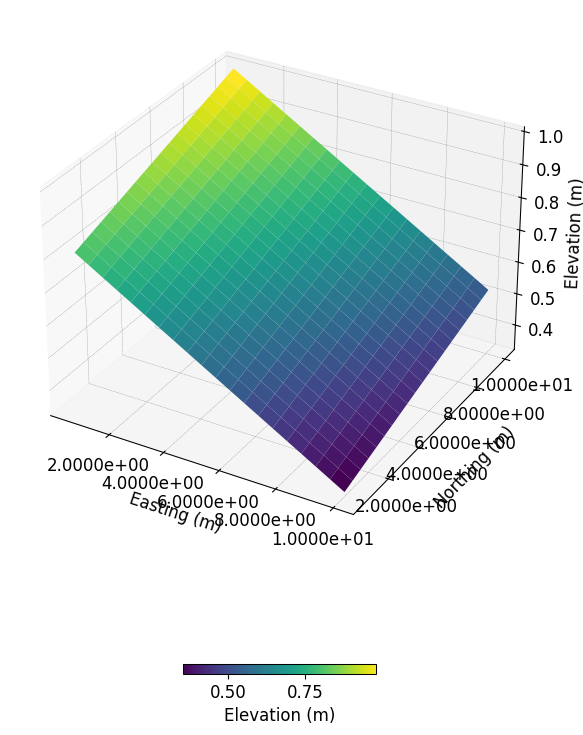

In [7]:
my_project.show_input(prop="dem")
DEM, header_DEM = my_project.read_inputs("dem")

### Create a mesh

In [8]:
my_project.create_mesh_vtk(verbose=False)

🍳 gfortran compilation

👟 Run preprocessor

🔄 update parm file 

🛠  Recompile src files [100s]

🍳 gfortran compilation [106s]

👟 Run processor

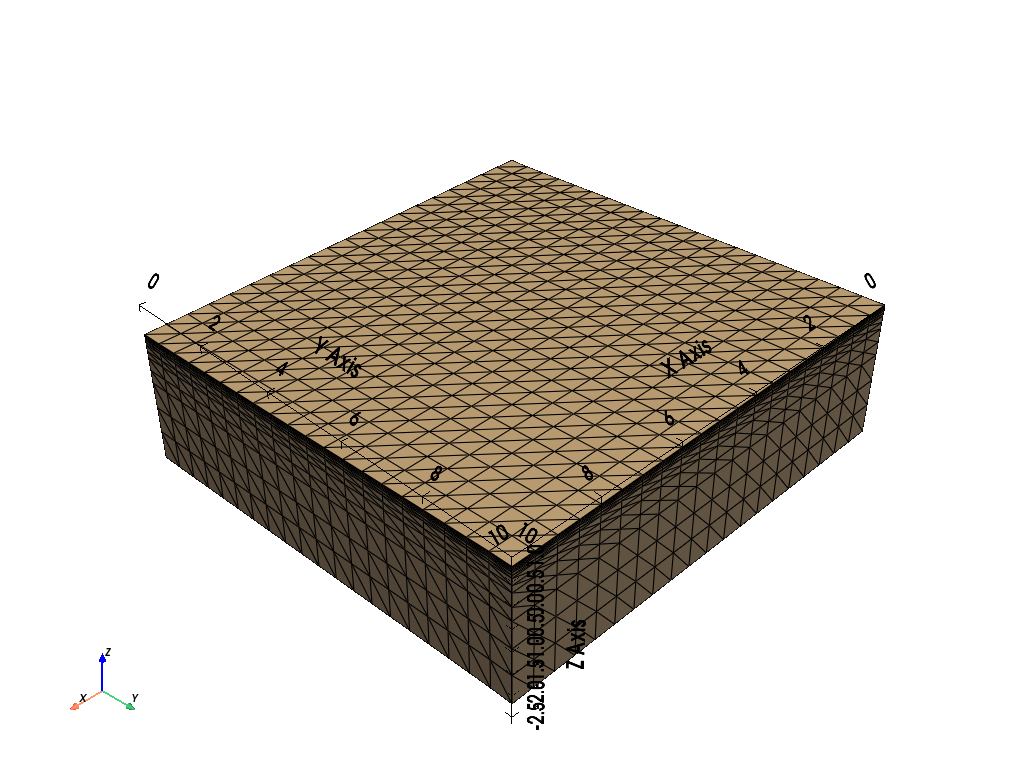

In [10]:
import os 
rootpath = os.path.join(my_project.workdir, my_project.project_name)
meshfile = rootpath + "/vtk/" + my_project.project_name + ".vtk"
mesh2plot = pv.read(meshfile)
mesh2plot.plot(show_edges=True, show_axes=True, show_bounds=True)

### Change DEM parameters

In [14]:
my_project.update_dem_parameters(
                            delta_x=10,
                            )

🔄 update dem_parameters file 

![CATHY_update_dem.png](attachment:85b33efa-3e69-4ceb-8836-6326ce9f668f.png)

In [15]:
my_project.create_mesh_vtk(verbose=False)

🍳 gfortran compilation

👟 Run preprocessor

🔄 update parm file 

🛠  Recompile src files [190s]

🍳 gfortran compilation [196s]

👟 Run processor

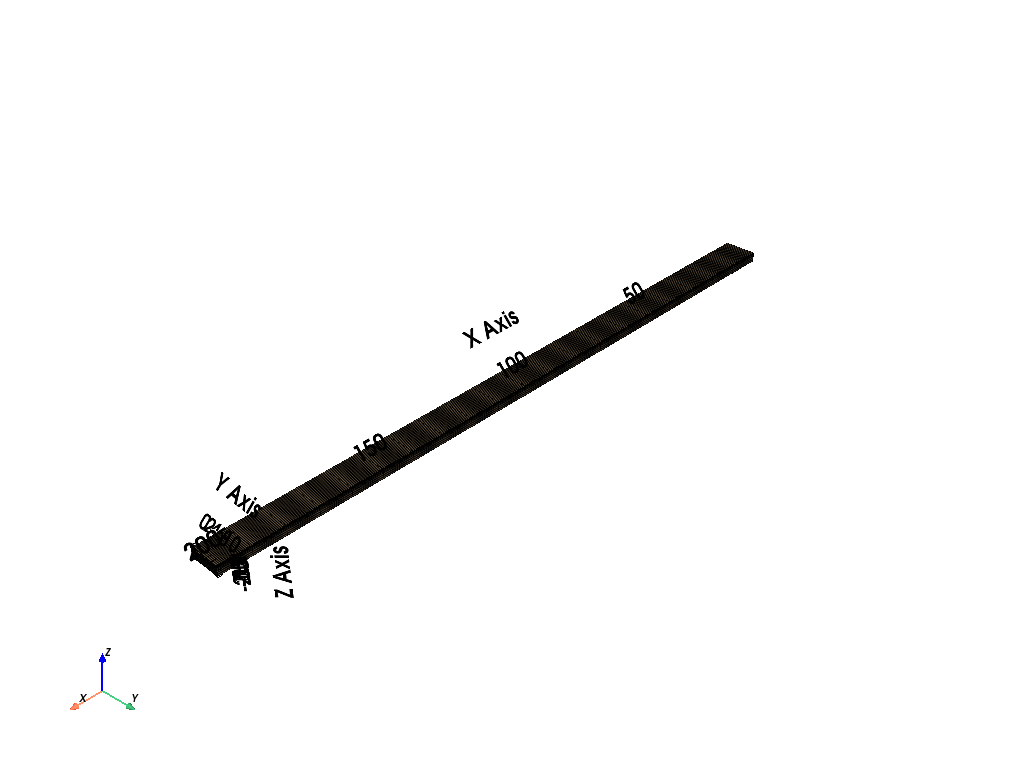

In [16]:
rootpath = os.path.join(my_project.workdir, my_project.project_name)
meshfile = rootpath + "/vtk/" + my_project.project_name + ".vtk"
mesh2plot = pv.read(meshfile)
mesh2plot.plot(show_edges=True, show_axes=True, show_bounds=True)

### Run preprocessor

```python
my_project.run_preprocessor()
```

### Run preprocessor

In [18]:
my_project.run_preprocessor()

🍳 gfortran compilation

👟 Run preprocessor

:::{tip}
Add **verbose=True** if you want to display terminal messages
:::

In [19]:
my_project.run_preprocessor(verbose=True)

🍳 gfortran compilation

👟 Run preprocessor

wbb...

 searching the dtm_13.val input file...
 assigned nodata value =  -9999.0000000000000     

 number of processed cells =         400

 ...wbb completed

 rn...
 csort I...
 ...completed

 depit...
 dem modifications =            0
 dem modifications =            0 (total)
 ...completed

 csort II...
 ...completed

 cca...

 contour curvature threshold value =    9.99999996E+11
 ...completed

 smean...
 mean (min,max) facet slope =  0.052056253 ( 0.020000000, 0.053851648)
 ...completed

 dsf...
 the drainage direction of the outlet cell (           8 ) is used
 ...completed

 hg...
 ...completed

 saving the data in the basin_b/basin_i files...

 ...rn completed

 mrbb...


 Select the header type:
 0) None
 1) ESRI ascii file
 2) GRASS ascii file
 (Ctrl C to exit)

 -> 
 Select the nodata value:
 (Ctrl C to exit)

 -> 
 Select the pointer system:
 1) HAP system
 2) Arc/Gis system
 (Ctrl C to exit)

 ->  ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 dem file

 min value = 0.335000E+00
 max value = 0.100000E+01
 number of cells =   400
 mean value = 0.667500E+00

 writing the output file...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 lakes_map file

 min value =     0
 max value =     0
 number of cells =   400
 mean value =     0.000000

 writing the output file...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 zone file

 min value =     1
 max value =     1
 number of cells =   400
 mean value =     1.000000

 writing the output file...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 dtm_w_1 file

 min value = 0.515524E+00
 max value = 0.100000E+01
 number of cells =   400
 mean value = 0.607575E+00

 writing the output file...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 dtm_w_2 file

 min value = 0.000000E+00
 max value = 0.484476E+00
 number of cells =   400
 mean value = 0.392425E+00

 writing the output file...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 dtm_p_outflow_1 file

 min value =     4
 max value =     8
 number of cells =   400
 mean value =     4.200000

 writing the output file...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 dtm_p_outflow_2 file

 min value =     0
 max value =     9
 number of cells =   400
 mean value =     6.792500

 writing the output file...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 A_inflow file

 min value = 0.000000000000E+00
 max value = 0.997499787031E+02
 number of cells =   400
 mean value = 0.388447785378E+01

 writing the output file...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 dtm_local_slope_1 file

 min value = 0.200000E-01
 max value = 0.500000E-01
 number of cells =   400
 mean value = 0.485000E-01

 writing the output file...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 dtm_local_slope_2 file

 min value = 0.000000E+00
 max value = 0.494975E-01
 number of cells =   400
 mean value = 0.400930E-01

 writing the output file...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 dtm_epl_1 file

 min value = 0.500000E+00
 max value = 0.500000E+00
 number of cells =   400
 mean value = 0.500000E+00

 writing the output file...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 dtm_epl_2 file

 min value = 0.000000E+00
 max value = 0.707107E+00
 number of cells =   400
 mean value = 0.572757E+00

 writing the output file...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 dtm_kSs1_sf_1 file

 min value = 0.240040E+02
 max value = 0.240040E+02
 number of cells =   400
 mean value = 0.240040E+02

 writing the output file...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 dtm_kSs1_sf_2 file

 min value = 0.000000E+00
 max value = 0.240040E+02
 number of cells =   400
 mean value = 0.194432E+02

 writing the output file...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 dtm_Ws1_sf file

 min value = 0.100000E+01
 max value = 0.100000E+01
 number of cells =   400
 mean value = 0.100000E+01

 writing the output file...

 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 dtm_Ws1_sf_2 file

 min value = 0.000000E+00
 max value = 0.100000E+01
 number of cells =   400
 mean value

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL

### 👟 Run processor

```python
my_project.run_processor()
```

In [20]:
my_project

In [21]:
my_project.run_processor(TRAFLAG=0)

🔄 update parm file 

🛠  Recompile src files [251s]

🍳 gfortran compilation [257s]

👟 Run processor

(examples-target)=
## 3. Examples

::::{grid} 1 2 2 2

:::{grid-item-card}
**1. Catchment hydrology**
^^^
pyCATHY mainly leverage:
- preprocessing
- plotting utilities
:::

:::{grid-item-card}
**2. Data Assimilation**
^^^
pyCATHY mainly leverage: 
- **Sobol sensibility** analysis
- **Single and multiples** data observations
- **EnKf** analysis (Bayesian approach)
:::

::::



   
:::{seealso} DA & CATHY: [Pasetto, 2015](https://www.slideshare.net/CoupledHydrologicalModeling/damiano-pasetto)
- Internally using **nudging**: [Paniconi et al. 2003](https://doi.org/10.1016/S0309-1708(02)00099-4), [Camporese et al. 2009](10.2136/vzj2009.0018)
- Internally using EnKF and SIR: [Pasetto et al. 2012](10.1016/j.advwatres.2012.06.009), [Manoli et al. 2015](10.1016/j.jcp.2014.11.035), [Rossi et al. 2015](10.1016/j.advwatres.2015.03.008)
- Externally using a wrapper (EnKF): [Botto et al. 2018](10.5194/hess-22-4251-2018)
- Perspectives: [Camporese and Girotto, 2021](https://www.frontiersin.org/articles/10.3389/frwa.2022.948832/full)
:::


(challenges-target)=
## 4. Challenges and perspectives

### How to share codes and data?
Save a copy of the simulation (a pickle file) for reuse within python

```python
my_project.backup_simu()
```


In [22]:
my_project.backup_simu()

### How to ensure reproducibility?

::::{grid} 1 2 2 2

:::{grid-item-card}
**1. pyCATHY implements test**
^^^
Every time there is a change in the core files the pyCATHY runs basic testing to check for possible bugs.
:::

:::{grid-item-card}
**2. pyCATHY is released publicly on github**
^^^
Assuming you **pin your simulation to a given version**, another user can reproduce it by installing the same version
:::

::::

### How to contribute?

pyCATHY aims to be a community-developed project. 
It's people like you who make it useful and successful!

::::{grid} 1 2 2 2

:::{grid-item-card}
**1. Improve documentation**
^^^
- Share and add examples
- Edit documentation
:::

:::{grid-item-card}
**2. Contribute to code**
^^^
- Open issues
- Fork, Commits and Pull Requests

:::

::::

![GUI.png](attachment:1313d48f-e5d9-49c1-a800-8008be460af8.png)